In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

## Carga de datos

In [3]:
datos_modelo = pd.read_csv('datos_modelo_all.csv')

In [4]:
datos_modelo = datos_modelo.drop("Community Name", 1)

In [5]:
datos_modelo.head()

,Type of crime,X Coordinate,Y Coordinate,Year,Month,Day,Wday,Hour,Min
0,OFFENSE INVOLVING CHILDREN,1185896,1873229,2001,1,1,2,0,0
1,OFFENSE INVOLVING CHILDREN,1149024,1867199,2001,1,1,2,0,0
2,THEFT,1161574,1882962,2001,1,1,2,0,0
3,THEFT,1162750,1851604,2001,1,1,2,0,0
4,THEFT,1164858,1870138,2001,1,1,2,0,0


In [6]:
datos_modelo.columns

Index(['Type of crime', 'X Coordinate', 'Y Coordinate', 'Year', 'Month', 'Day',
       'Wday', 'Hour', 'Min'],
      dtype='object')

In [7]:
datos_modelo.tail()

,Type of crime,X Coordinate,Y Coordinate,Year,Month,Day,Wday,Hour,Min
6090627,CRIMINAL DAMAGE,1173434,1886695,2018,12,2,1,23,50
6090628,BATTERY,1140761,1909144,2018,12,2,1,23,50
6090629,ROBBERY,1170949,1854878,2018,12,2,1,23,54
6090630,DECEPTIVE PRACTICE,1167085,1943221,2018,12,2,1,23,55
6090631,BURGLARY,1151952,1939941,2018,12,3,2,16,30


In [8]:
# Variables dummy a partir de la variable categórica "Type of crime"
dummy_typ_crime = pd.get_dummies(datos_modelo["Type of crime"], prefix = "Type")
dummy_typ_crime.head()

,Type_ARSON,Type_ASSAULT,Type_BATTERY,Type_BURGLARY,Type_CONCEALED CARRY LICENSE VIOLATION,Type_CRIM SEXUAL ASSAULT,Type_CRIMINAL DAMAGE,Type_CRIMINAL TRESPASS,Type_DECEPTIVE PRACTICE,Type_GAMBLING,...,Type_OTHER OFFENSE,Type_PROSTITUTION,Type_PUBLIC INDECENCY,Type_PUBLIC PEACE VIOLATION,Type_RITUALISM,Type_ROBBERY,Type_SEX OFFENSE,Type_STALKING,Type_THEFT,Type_WEAPONS VIOLATION
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Eliminar del dataframe principal la variable original referida a la tipología
# del delito y anadir las variables dummy

column_name = datos_modelo.columns.values.tolist()

datos_modelo = datos_modelo.drop(["Type of crime"], axis = 1)

datos_modelo = pd.concat([datos_modelo, dummy_typ_crime], axis = 1)
datos_modelo.head()

,X Coordinate,Y Coordinate,Year,Month,Day,Wday,Hour,Min,Type_ARSON,Type_ASSAULT,...,Type_OTHER OFFENSE,Type_PROSTITUTION,Type_PUBLIC INDECENCY,Type_PUBLIC PEACE VIOLATION,Type_RITUALISM,Type_ROBBERY,Type_SEX OFFENSE,Type_STALKING,Type_THEFT,Type_WEAPONS VIOLATION
0,1185896,1873229,2001,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1149024,1867199,2001,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1161574,1882962,2001,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1162750,1851604,2001,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1164858,1870138,2001,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Conjuntos de entrenamiento y validación

In [10]:
len(datos_modelo)

6090632

In [11]:
train = datos_modelo[datos_modelo["Year"] < 2014]
test = datos_modelo[datos_modelo["Year"] >= 2014]

In [12]:
print("train: {} ({} %), test: {} ({} %)".format(len(train), (len(train)/len(datos_modelo))*100, len(test), (len(test)/len(datos_modelo))*100))

train: 4786445 (78.58700049518671 %), test: 1304187 (21.412999504813293 %)


In [13]:
train.tail()

,X Coordinate,Y Coordinate,Year,Month,Day,Wday,Hour,Min,Type_ARSON,Type_ASSAULT,...,Type_OTHER OFFENSE,Type_PROSTITUTION,Type_PUBLIC INDECENCY,Type_PUBLIC PEACE VIOLATION,Type_RITUALISM,Type_ROBBERY,Type_SEX OFFENSE,Type_STALKING,Type_THEFT,Type_WEAPONS VIOLATION
4786440,1187279,1867502,2013,12,31,3,23,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4786441,1175694,1846768,2013,12,31,3,23,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4786442,1161633,1898661,2013,12,31,3,23,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4786443,1142672,1899189,2013,12,31,3,23,55,0,0,...,0,0,0,0,0,0,0,0,0,0
4786444,1152212,1919266,2013,12,31,3,23,59,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test.head()

,X Coordinate,Y Coordinate,Year,Month,Day,Wday,Hour,Min,Type_ARSON,Type_ASSAULT,...,Type_OTHER OFFENSE,Type_PROSTITUTION,Type_PUBLIC INDECENCY,Type_PUBLIC PEACE VIOLATION,Type_RITUALISM,Type_ROBBERY,Type_SEX OFFENSE,Type_STALKING,Type_THEFT,Type_WEAPONS VIOLATION
4786445,1167208,1870604,2014,1,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786446,1165478,1873273,2014,1,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786447,1125707,1925135,2014,1,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786448,1169965,1916711,2014,1,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4786449,1167076,1917390,2014,1,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
all_columns = datos_modelo.columns.values.tolist()
attr_columns = ["X Coordinate", "Y Coordinate", "Year", "Month", "Day", "Wday", "Hour", "Min"]
labels_columns = [x for x in all_columns if x not in attr_columns]

train_attr = train[attr_columns]
train_labels = train[labels_columns]

test_attr = test[attr_columns]
test_labels = test[labels_columns]

In [21]:
print("Dimensiones")
print("train_attr: ", train_attr.shape, "train_labels: ", train_labels.shape, "test_attr: ", test_attr.shape, "test_labels: ", test_labels.shape)

Dimensiones
train_attr:  (4786445, 8) train_labels:  (4786445, 34) test_attr:  (1304187, 8) test_labels:  (1304187, 34)


In [22]:
def change_type(df):
    for attr in df:
        df[attr] = df[attr].astype(float)
    print("Conversión realizada")

In [23]:
change_type(train_attr)
change_type(train_labels)
change_type(test_attr)
change_type(test_labels)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Conversión realizada
Conversión realizada
Conversión realizada
Conversión realizada


In [24]:
test_attr.dtypes

X Coordinate    float64
Y Coordinate    float64
Year            float64
Month           float64
Day             float64
Wday            float64
Hour            float64
Min             float64
dtype: object

## Modelo de datos

In [29]:
neurons_hidden1 = 50
neurons_hidden2 = 20
neurons_hidden3 = 8

x = tf.placeholder(tf.float32, [None, 8])
y_ = tf.placeholder(tf.float32, [None, 34])

W0 = tf.Variable(tf.random_normal([8, neurons_hidden1], stddev = 0.01))
B0 = tf.Variable(tf.random_normal([neurons_hidden1], stddev = 0.01))

W1 = tf.Variable(tf.random_normal([neurons_hidden1, neurons_hidden2], stddev = 0.01))
B1 = tf.Variable(tf.random_normal([neurons_hidden2], stddev = 0.01))

W2 = tf.Variable(tf.random_normal([neurons_hidden2, neurons_hidden3], stddev = 0.01))
B2 = tf.Variable(tf.random_normal([neurons_hidden3], stddev = 0.01))

W3 = tf.Variable(tf.random_normal([neurons_hidden3, 34], stddev = 0.01))
B3 = tf.Variable(tf.random_normal([34], stddev = 0.01))

h = tf.nn.relu(tf.matmul(x, W0) + B0)
g = tf.nn.relu(tf.matmul(h, W1) + B1)
t = tf.nn.relu(tf.matmul(g, W2) + B2)
y = tf.nn.softmax(tf.matmul(t, W3) + B3)

## Entrenamiento y validación del modelo

In [30]:
# Error medio cuadrático
cost = tf.reduce_mean(tf.square(y - y_))
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_))
#train_step  = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
train_step = tf.train.AdamOptimizer().minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session(config=config)
sess.run(init)

trainLoss = []
testLoss = []

for i in range(120):
    sess.run(train_step, feed_dict={x:train_attr, y_:train_labels})
    
    loss_train = sess.run(cost, feed_dict={x:train_attr, y_:train_labels})
    loss_test = sess.run(cost, feed_dict={x:test_attr, y_:test_labels})
    
    trainLoss.append(loss_train)
    testLoss.append(loss_test)
    
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
print(sess.run(accuracy, feed_dict={x: test_attr, y_: test_labels}))   
print('Training finished.')

0.23100905
Training finished.


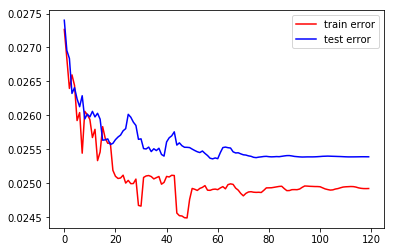

In [31]:
plt.plot(trainLoss, 'r', label = "train error")
plt.plot(testLoss, 'b', label = "test error")
plt.legend()
#plt.show()

In [32]:
pred = sess.run(y, feed_dict={x: test_attr, y_: test_labels})

In [33]:
print(pred)

[[0.00091375 0.0601091  0.17982598 ... 0.00090384 0.2050387  0.0076988 ]
 [0.00090998 0.06008995 0.17994313 ... 0.0009001  0.20519961 0.007682  ]
 [0.00084316 0.05972875 0.18208674 ... 0.00083374 0.20815547 0.00737797]
 ...
 [0.00094081 0.060243   0.17899683 ... 0.00093071 0.20390108 0.00781843]
 [0.00079061 0.05941891 0.183866   ... 0.00078161 0.21062174 0.00712975]
 [0.00080403 0.05950054 0.18340278 ... 0.00079493 0.2099785  0.00719398]]


In [30]:
print(sum(pred[0]))

0.9999998606217559


In [31]:
print(pred[0])

[0.00114927 0.06137323 0.18099143 0.06645609 0.00028202 0.00346984
 0.11054471 0.02612101 0.03724357 0.00139605 0.0009325  0.00224396
 0.00230649 0.00086937 0.00071492 0.00112864 0.04368035 0.10704903
 0.00038856 0.00054652 0.00156353 0.00050306 0.00573661 0.00124599
 0.05819661 0.00784159 0.00204423 0.00824657 0.03948203 0.00211731
 0.00132714 0.21219432 0.01061329]
